In [12]:
from skxray.core import roi 
import skxray.core.correlation as corr
from skxray.core import utils

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data = np.asarray(duke_data)    

avg_img = np.average(duke_data, axis=0)

mask4 = np.load(data_dir+"new_mask4.npy")

#mask = np.load(data_dir+"Luxi_duke_mask.npy")

mask = ~np.load("/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/Luxi_duke_mask.npy")

N_mask = ~(mask)

mask_data1 = N_mask*duke_data[0:2655]
mask_data2 = N_mask*duke_data[2659:4999]

inner_radius = 30
width = 1
spacing = 1
num_rings = 6

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, (133, 143), avg_img.shape)

rings_mask = rings*N_mask


In [17]:
images[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [18]:
num_levels = 20
num_bufs = 16
g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, rings_mask,
                                             images[0:2])

In [20]:
g2[:,0]


array([ 46.04094998,  45.28914027])

In [13]:
images = N_mask*duke_data

num_levels = 7
num_bufs = 8
g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, rings_mask,
                                             images)

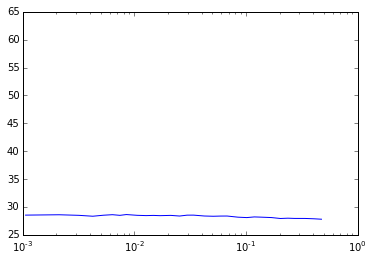

In [15]:
exposuretime = 0.001;
deadtime = 60e-6;
timeperframe = exposuretime + deadtime
lags = lag_steps * timeperframe

plt.semilogx(lags, g2[:,0])
#plt.ylim(1, 1.2)
